In [174]:
# Import the needed libraries
import pyodbc                           # connection to the database (PyPI, 2019)
import pandas as pd                     # pandas dataframes (www.w3schools.com, n.d.)
import matplotlib.pyplot as plt         # charts and graphs (www.w3schools.com, n.d.)
from pyspark.sql import SparkSession    # configuration of the spark session, pyspark sql queries, and miscellaneous commands (spark.apache.org, n.d.)
from pyspark.sql.functions import isnull, when, count

In [175]:
# Initialise a spark session
spark = SparkSession.builder.config("spark.driver.host", "localhost").getOrCreate()

In [176]:
# Set Azure SQL database connection properties (adapted from (Stack Overflow, n.d.))
server = 'anproject-sqlserver.database.windows.net'
database = 'anproject-sqldatabase'
username = 'anproject-sqlserver'
password = 'zRd}gAPy/*Q625r(fSNTt&'
driver= '{ODBC Driver 18 for SQL Server}'

In [177]:
# Create the connection and cursor
conn = pyodbc.connect('DRIVER=' + driver + ';SERVER=' +
    server + ';PORT=1433;DATABASE=' + database +
    ';UID=' + username + ';PWD=' + password)
print(conn)

cursor = conn.cursor()

In [178]:
# Get each table into a dataframe
query = "SELECT * FROM Stage.Club"
Club = pd.read_sql(query, conn)

query = "SELECT * FROM Stage.Dictionary"
Dictionary = pd.read_sql(query, conn)

query = "SELECT * FROM Stage.Lineup"
Lineup = pd.read_sql(query, conn)

query = "SELECT * FROM Stage.Match"
Match = pd.read_sql(query, conn)

query = "SELECT * FROM Stage.Player"
Player = pd.read_sql(query, conn)

query = "SELECT * FROM Stage.PlayerValue"
PlayerValue = pd.read_sql(query, conn)

query = "SELECT * FROM Stage.[Table]"
Table = pd.read_sql(query, conn)

query = "SELECT * FROM Stage.Transfer"
Transfer = pd.read_sql(query, conn)

C:\Users\Alfie\AppData\Local\Temp\ipykernel_19992\3561929394.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Club = pd.read_sql(query, conn)
C:\Users\Alfie\AppData\Local\Temp\ipykernel_19992\3561929394.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Dictionary = pd.read_sql(query, conn)
C:\Users\Alfie\AppData\Local\Temp\ipykernel_19992\3561929394.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Lineup = pd.read_sql(query, conn)
C:\Users\Alfie\AppData\Local\Temp\ipykernel_19992\3561929394.py:15: UserWarning: pand

In [179]:
# Close the connection
conn.close()

In [180]:
# Convert the pandas dataframes to spark dataframes
Club=spark.createDataFrame(Club)
Dictionary=spark.createDataFrame(Dictionary)
Lineup=spark.createDataFrame(Lineup)
Match=spark.createDataFrame(Match)
Player=spark.createDataFrame(Player)
PlayerValue=spark.createDataFrame(PlayerValue)
Table=spark.createDataFrame(Table)
Transfer=spark.createDataFrame(Transfer)

C:\Users\Alfie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyspark\sql\pandas\conversion.py:485: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:


In [181]:
# Check for missing values in each table
Club.select([count(when(isnull(column), column)).alias(column) for column in Club.columns]).show(truncate=False, vertical=True)
Dictionary.select([count(when(isnull(column), column)).alias(column) for column in Dictionary.columns]).show(truncate=False, vertical=True)
Lineup.select([count(when(isnull(column), column)).alias(column) for column in Lineup.columns]).show(truncate=False, vertical=True)
Match.select([count(when(isnull(column), column)).alias(column) for column in Match.columns]).show(truncate=False, vertical=True)
Player.select([count(when(isnull(column), column)).alias(column) for column in Player.columns]).show(truncate=False, vertical=True)
PlayerValue.select([count(when(isnull(column), column)).alias(column) for column in PlayerValue.columns]).show(truncate=False, vertical=True)
Table.select([count(when(isnull(column), column)).alias(column) for column in Table.columns]).show(truncate=False, vertical=True)
Transfer.select([count(when(isnull(column), column)).alias(column) for column in Transfer.columns]).show(truncate=False, vertical=True)

-RECORD 0------------------
 ClubID              | 0   
 ClubName            | 0   
 SquadSize           | 0   
 AverageAge          | 0   
 NationalTeamPlayers | 0   
 StadiumName         | 0   
 StadiumSeats        | 0   
 TransferRecord      | 0   

-RECORD 0----------
 ColumnName  | 0   
 ID          | 0   
 Explanation | 0   

-RECORD 0---------
 GameID     | 0   
 ClubID     | 0   
 PlayerID   | 0   
 Type       | 0   
 Number     | 0   
 PlayerName | 0   
 Captain    | 0   
 Position   | 0   

-RECORD 0----------------
 Date              | 0   
 HomeClub          | 0   
 AwayClub          | 0   
 FullTimeHomeGoals | 0   
 FullTimeAwayGoals | 0   
 HalfTimeHomeGoals | 0   
 HalfTimeAwayGoals | 0   
 Referee           | 0   
 HomeShots         | 0   
 AwayShots         | 0   
 HomeShotsOnTarget | 0   
 AwaySHotsOnTarget | 0   
 HomeFouls         | 0   
 AwayFouls         | 0   
 HomeCorners       | 0   
 AwayCorneras      | 0   
 HomeYellows       | 0   
 AwayYellows       | 0   


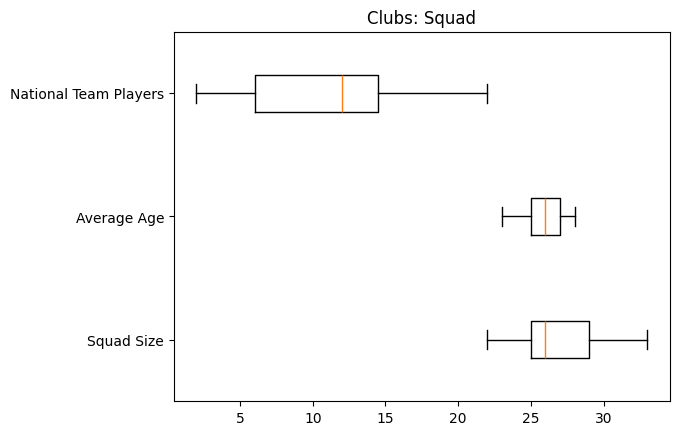

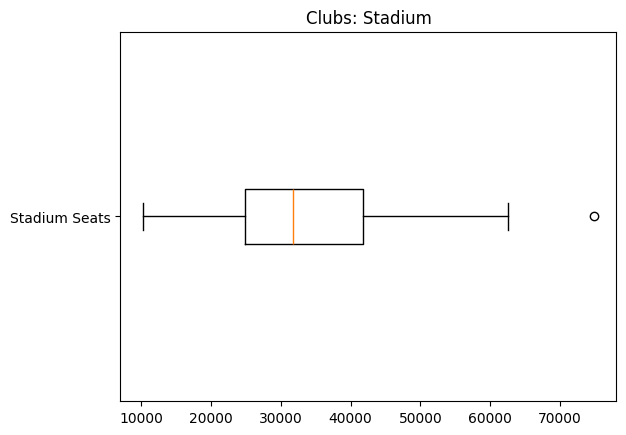

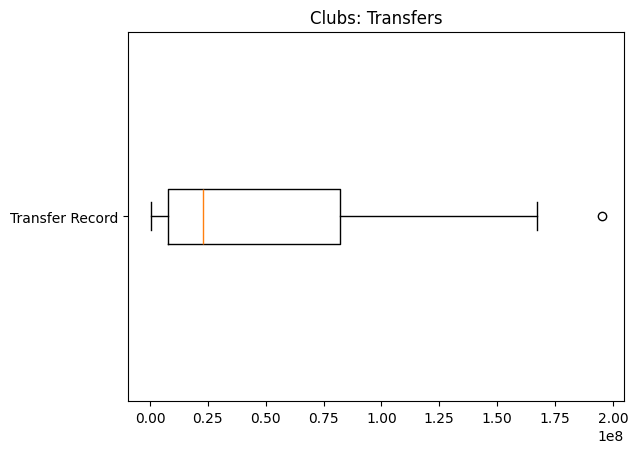

In [182]:
# Create boxplots for each continuous column in each table

# CLUBS TABLE
# convert the column to a disctionary by collecting the values in the tables
SquadSize = [i.asDict()["SquadSize"] for i in Club.select("SquadSize").collect()]
AverageAge = [i.asDict()["AverageAge"] for i in Club.select("AverageAge").collect()]
NationalTeamPlayers = [i.asDict()["NationalTeamPlayers"] for i in Club.select("NationalTeamPlayers").collect()]
StadiumSeats = [i.asDict()["StadiumSeats"] for i in Club.select("StadiumSeats").collect()]
TransferRecord = [i.asDict()["TransferRecord"] for i in Club.select("TransferRecord").collect()]

# assign the data, titles and axis to a plot
data = [SquadSize, AverageAge, NationalTeamPlayers]
xLabels = ["Squad Size", "Average Age", "National Team Players"]
fig, ax = plt.subplots()
ax.boxplot(data, labels = xLabels, vert = False)
ax.set_title("Clubs: Squad")
# draw the plot
plt.show()

data = [StadiumSeats]
xLabels = ["Stadium Seats"]
fig, ax = plt.subplots()
ax.boxplot(data, labels = xLabels, vert = False)
ax.set_title("Clubs: Stadium")
plt.show()

data = [TransferRecord]
xLabels = ["Transfer Record"]
fig, ax = plt.subplots()
ax.boxplot(data, labels = xLabels, vert = False)
ax.set_title("Clubs: Transfers")
plt.show()

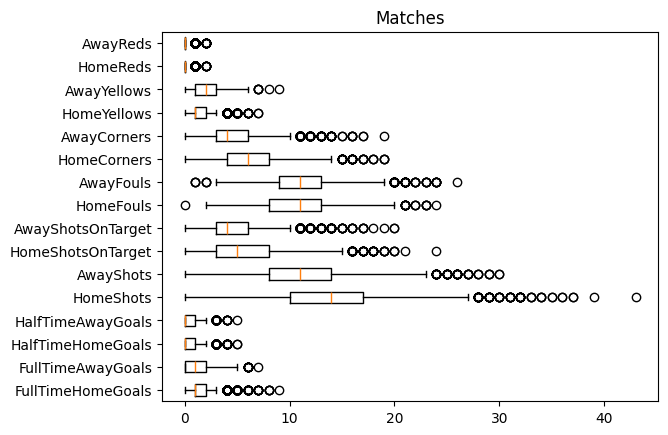

In [183]:
# MATCH TABLE
FullTimeHomeGoals = [i.asDict()["FullTimeHomeGoals"] for i in Match.select("FullTimeHomeGoals").collect()]
FullTimeAwayGoals = [i.asDict()["FullTimeAwayGoals"] for i in Match.select("FullTimeAwayGoals").collect()]
HalfTimeHomeGoals = [i.asDict()["HalfTimeHomeGoals"] for i in Match.select("HalfTimeHomeGoals").collect()]
HalfTimeAwayGoals = [i.asDict()["HalfTimeAwayGoals"] for i in Match.select("HalfTimeAwayGoals").collect()]
HomeShots = [i.asDict()["HomeShots"] for i in Match.select("HomeShots").collect()]
AwayShots = [i.asDict()["AwayShots"] for i in Match.select("AwayShots").collect()]
HomeShotsOnTarget = [i.asDict()["HomeShotsOnTarget"] for i in Match.select("HomeShotsOnTarget").collect()]
AwayShotsOnTarget = [i.asDict()["AwayShotsOnTarget"] for i in Match.select("AwayShotsOnTarget").collect()]
HomeFouls = [i.asDict()["HomeFouls"] for i in Match.select("HomeFouls").collect()]
AwayFouls = [i.asDict()["AwayFouls"] for i in Match.select("AwayFouls").collect()]
HomeCorners = [i.asDict()["HomeCorners"] for i in Match.select("HomeCorners").collect()]
AwayCorners = [i.asDict()["AwayCorneras"] for i in Match.select("AwayCorneras").collect()]
HomeYellows = [i.asDict()["HomeYellows"] for i in Match.select("HomeYellows").collect()]
AwayYellows = [i.asDict()["AwayYellows"] for i in Match.select("AwayYellows").collect()]
HomeReds = [i.asDict()["HomeReds"] for i in Match.select("HomeReds").collect()]
AwayReds = [i.asDict()["AwayReds"] for i in Match.select("AwayReds").collect()]

data = [FullTimeHomeGoals, FullTimeAwayGoals, HalfTimeHomeGoals, HalfTimeAwayGoals, HomeShots, AwayShots, HomeShotsOnTarget, AwayShotsOnTarget, HomeFouls, AwayFouls, HomeCorners, AwayCorners, HomeYellows, AwayYellows, HomeReds, AwayReds]
xLabels = ["FullTimeHomeGoals", "FullTimeAwayGoals", "HalfTimeHomeGoals", "HalfTimeAwayGoals", "HomeShots", "AwayShots", "HomeShotsOnTarget", "AwayShotsOnTarget", "HomeFouls", "AwayFouls", "HomeCorners", "AwayCorners", "HomeYellows", "AwayYellows", "HomeReds", "AwayReds"]
fig, ax = plt.subplots()
ax.boxplot(data, labels = xLabels, vert = False)
ax.set_title("Matches")
plt.show()

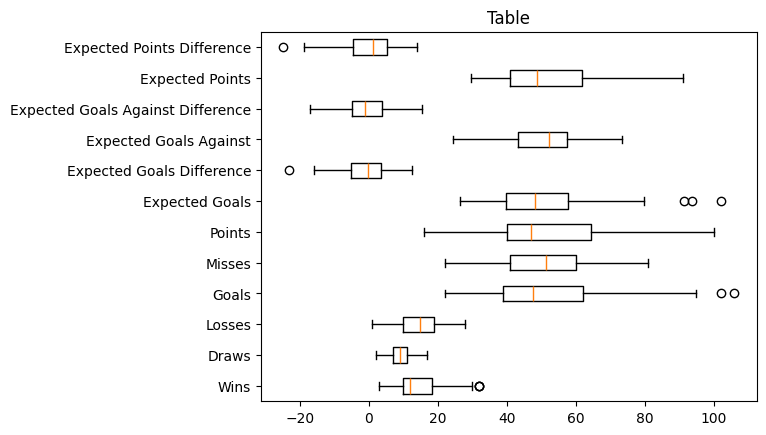

In [185]:
# TABLE TABLE
Wins = [i.asDict()["Wins"] for i in Table.select("Wins").collect()]
Draws = [i.asDict()["Draws"] for i in Table.select("Draws").collect()]
Losses = [i.asDict()["Loses"] for i in Table.select("Loses").collect()]
Goals = [i.asDict()["Goals"] for i in Table.select("Goals").collect()]
Misses = [i.asDict()["Misses"] for i in Table.select("Misses").collect()]
Points = [i.asDict()["Points"] for i in Table.select("Points").collect()]
ExpectedGoals = [i.asDict()["ExpectedGoals"] for i in Table.select("ExpectedGoals").collect()]
ExpectedGoalsDifference = [i.asDict()["ExpectedGoalsDifference"] for i in Table.select("ExpectedGoalsDifference").collect()]
ExpectedGoalsAgainst = [i.asDict()["ExpectedGoalsAgainst"] for i in Table.select("ExpectedGoalsAgainst").collect()]
ExpectedGoalsAgainstDifference = [i.asDict()["ExpectedGoalsAgainstDifference"] for i in Table.select("ExpectedGoalsAgainstDifference").collect()]
ExpectedPoints = [i.asDict()["ExpectedPoints"] for i in Table.select("ExpectedPoints").collect()]
ExpectedPointsDifference = [i.asDict()["ExpectedPointsDifference"] for i in Table.select("ExpectedPointsDifference").collect()]

data = [Wins, Draws, Losses, Goals, Misses, Points, ExpectedGoals, ExpectedGoalsDifference, ExpectedGoalsAgainst, ExpectedGoalsAgainstDifference, ExpectedPoints, ExpectedPointsDifference]
xLabels = ["Wins", "Draws", "Losses", "Goals", "Misses", "Points", "Expected Goals", "Expected Goals Difference", "Expected Goals Against", "Expected Goals Against Difference", "Expected Points", "Expected Points Difference"]
fig, ax = plt.subplots()
ax.boxplot(data, labels = xLabels, vert = False)
ax.set_title("Table")
plt.show()

<Axes: xlabel='Position'>

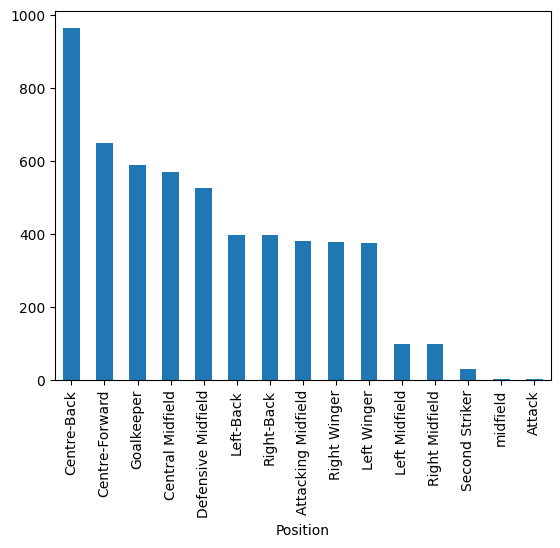

In [188]:
# Create bar charts for each categorical column in each table

# LINEUP TABLE
# convert to poandas for easier processing
Lineup = Lineup.toPandas()
# draw the plot
Lineup["Position"].value_counts().plot(kind = "bar")

<Axes: xlabel='Position'>

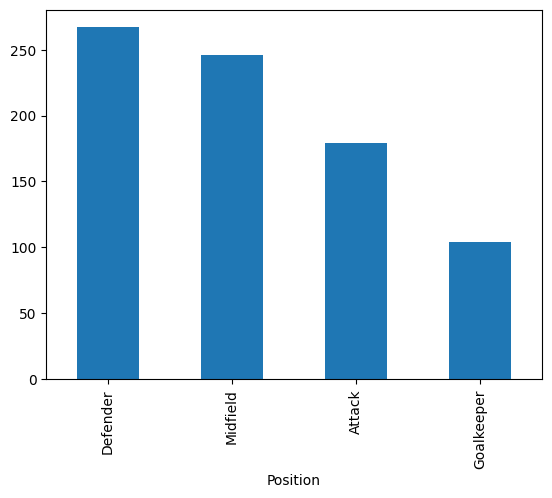

In [192]:
Player["Position"].value_counts().plot(kind = "bar")

<Axes: xlabel='SubPosition'>

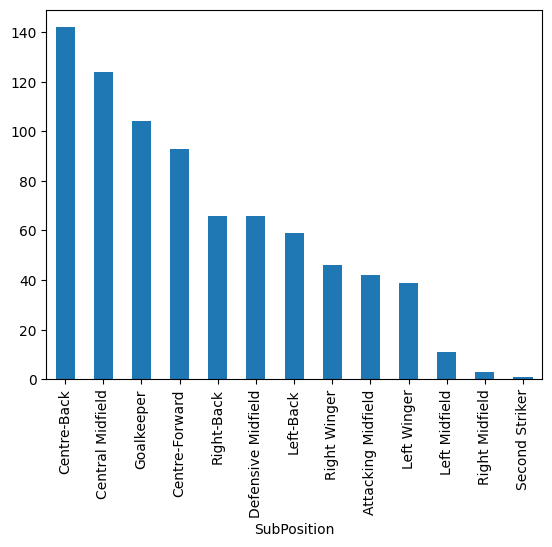

In [193]:
Player["SubPosition"].value_counts().plot(kind = "bar")

<Axes: xlabel='PreferredFoot'>

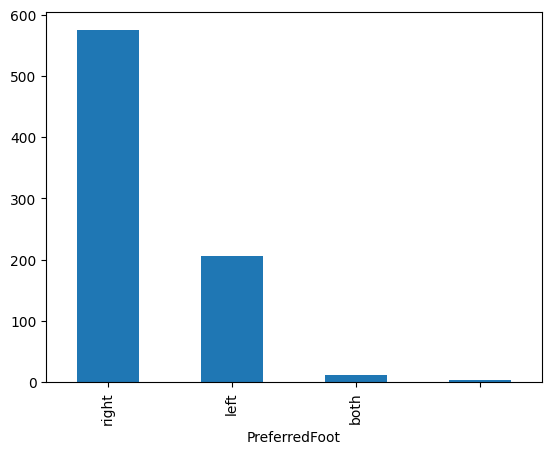

In [194]:
Player["PreferredFoot"].value_counts().plot(kind = "bar")

<Axes: xlabel='TransferMovement'>

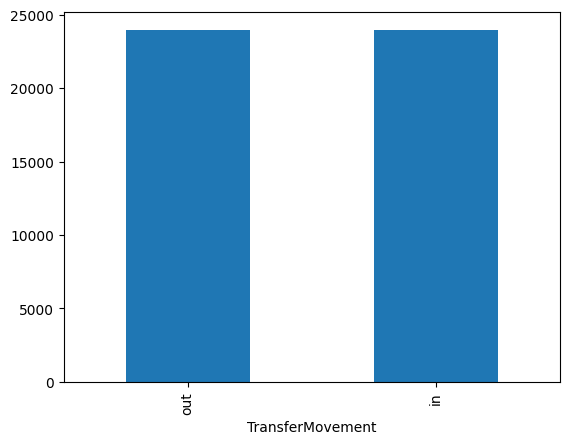

In [195]:
# TRANSFER TABLE
Transfer = Transfer.toPandas()
Transfer["TransferMovement"].value_counts().plot(kind = "bar")

<Axes: xlabel='Position'>

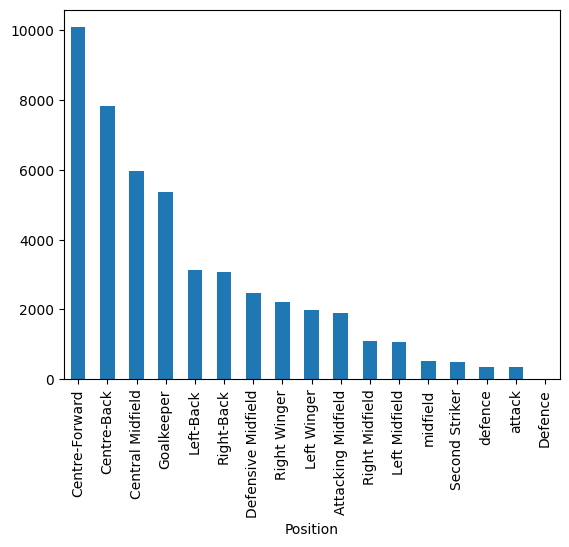

In [196]:
Transfer["Position"].value_counts().plot(kind = "bar")

<Axes: xlabel='Season'>

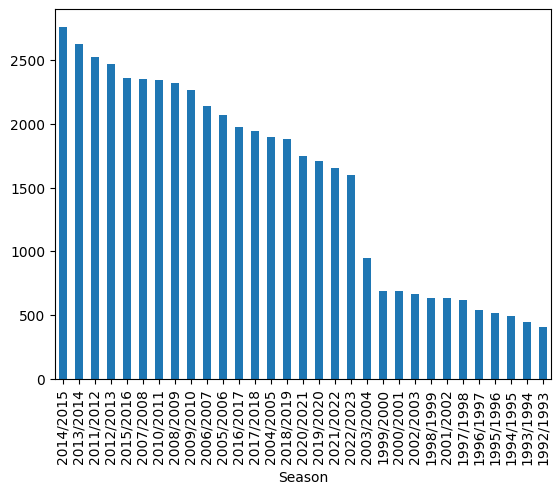

In [197]:
Transfer["Season"].value_counts().plot(kind = "bar")

<Axes: xlabel='TransferType'>

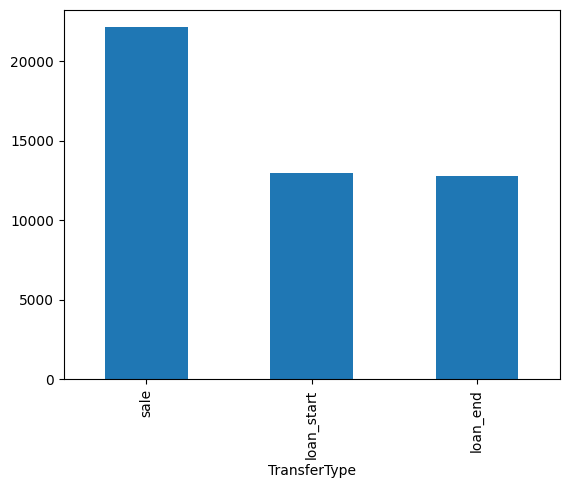

In [198]:
Transfer["TransferType"].value_counts().plot(kind = "bar")

<Axes: xlabel='ClubName'>

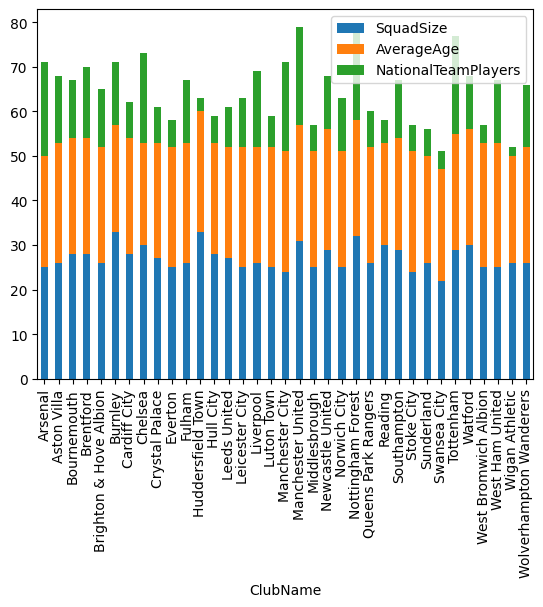

In [199]:
# Stacked column chart for every club
Club = Club.toPandas()
# collect the columns for each stacked column
Club.loc[:,['ClubName', 'SquadSize', 'AverageAge', 'NationalTeamPlayers']].set_index("ClubName").plot.bar(stacked = True)

<Axes: xlabel='ClubName'>

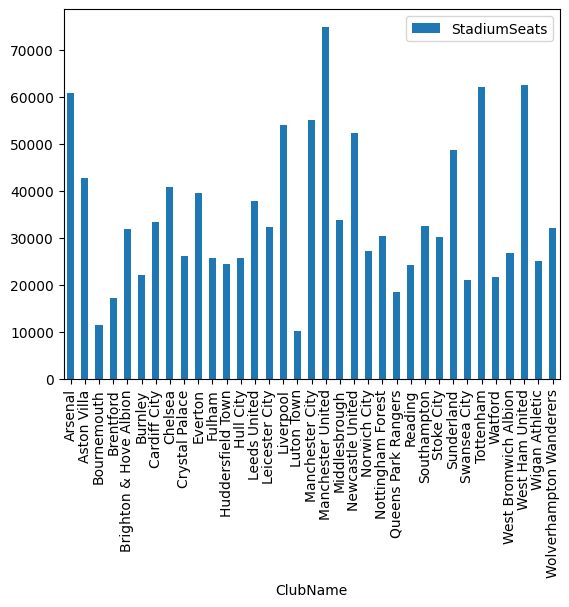

In [200]:
Club.loc[:,['ClubName', 'StadiumSeats']].set_index("ClubName").plot.bar(stacked = True)

<Axes: xlabel='ClubName'>

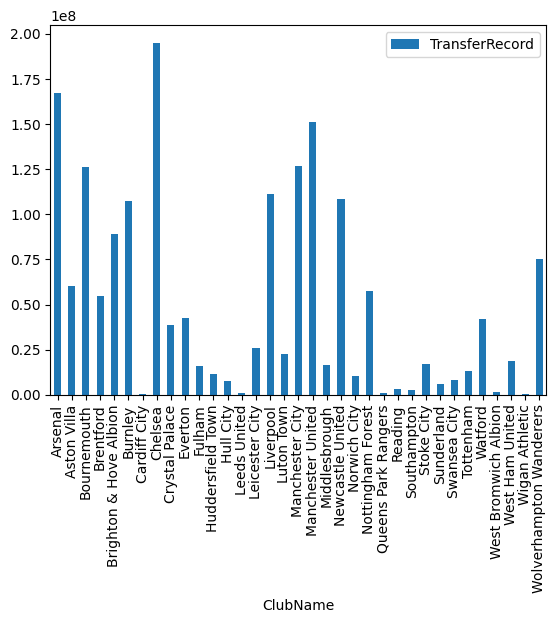

In [201]:
Club.loc[:,['ClubName', 'TransferRecord']].set_index("ClubName").plot.bar(stacked = True)

,ClubID,SquadSize,AverageAge,NationalTeamPlayers,StadiumSeats,TransferRecord
ClubID,1.000000,-0.165885,0.039631,-0.245275,0.078238,-0.452109
SquadSize,-0.165885,1.000000,-0.319684,0.250552,-0.019650,0.217199
AverageAge,0.039631,-0.319684,1.000000,0.016630,0.100720,-0.147598
NationalTeamPlayers,-0.245275,0.250552,0.016630,1.000000,0.566741,0.699431
StadiumSeats,0.078238,-0.019650,0.100720,0.566741,1.000000,0.407251
TransferRecord,-0.452109,0.217199,-0.147598,0.699431,0.407251,1.000000


<Axes: xlabel='TransferRecord', ylabel='StadiumSeats'>

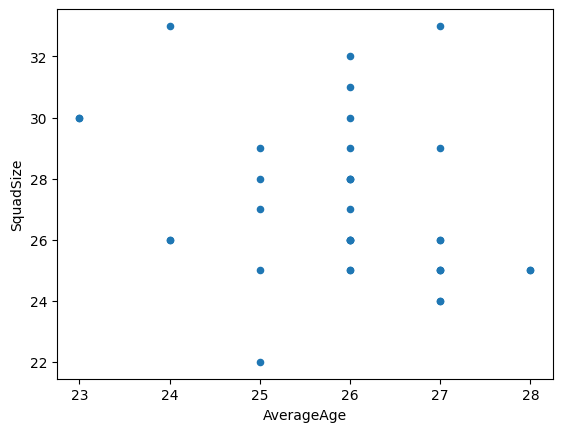

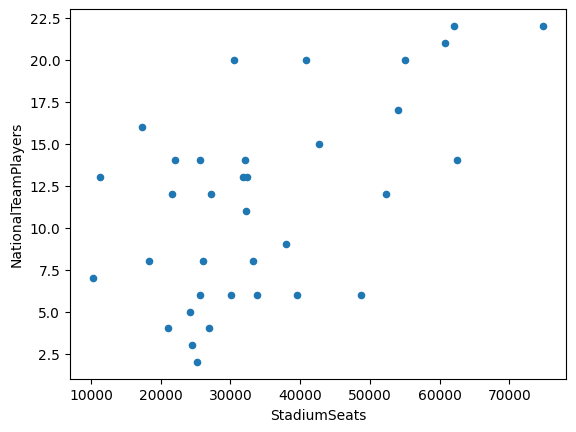

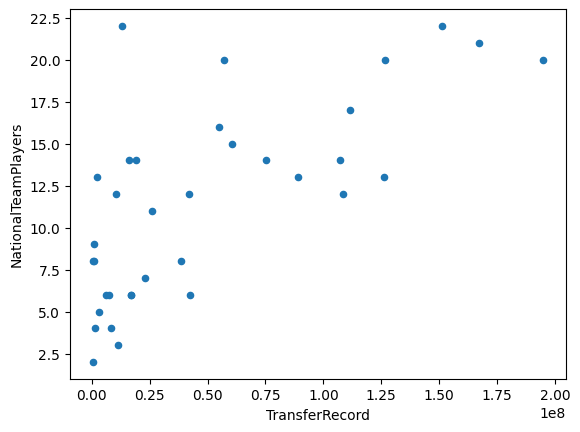

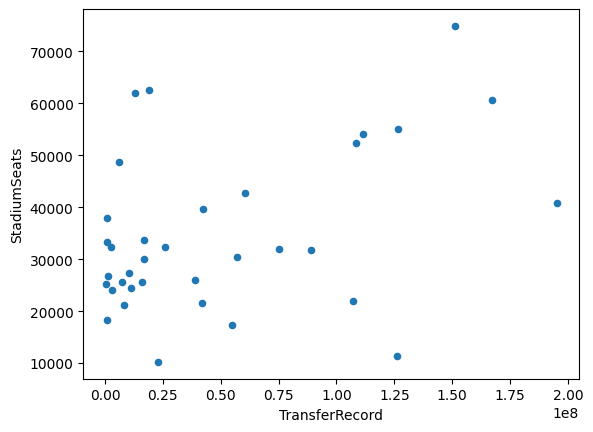

In [204]:
# Correlation matrix and Scatter plot between club columns
# draw the plots
display(Club.corr(numeric_only = True))
Club.plot.scatter(x = "AverageAge", y = "SquadSize")
Club.plot.scatter(x = "StadiumSeats", y = "NationalTeamPlayers")
Club.plot.scatter(x = "TransferRecord", y = "NationalTeamPlayers")
Club.plot.scatter(x = "TransferRecord", y = "StadiumSeats")

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwaySHotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorneras,HomeYellows,AwayYellows,HomeReds,AwayReds
FullTimeHomeGoals,1.000000,-0.084583,0.684379,-0.059961,0.288352,-0.152125,0.446156,-0.100444,-0.059840,-0.045542,0.057204,-0.080303,-0.111800,-0.011191,-0.080648,0.072354
FullTimeAwayGoals,-0.084583,1.000000,-0.076795,0.688853,-0.129333,0.315120,-0.105015,0.447233,0.025352,-0.035226,-0.089446,0.050975,0.120465,-0.002574,0.120085,-0.071213
HalfTimeHomeGoals,0.684379,-0.076795,1.000000,-0.063928,0.113571,-0.050176,0.262534,-0.055309,-0.010984,-0.018723,-0.048504,-0.001218,-0.090930,-0.017107,-0.035080,0.026707
HalfTimeAwayGoals,-0.059961,0.688853,-0.063928,1.000000,-0.052253,0.152371,-0.057093,0.284159,0.023699,-0.003783,-0.025822,-0.027694,0.104030,0.006671,0.070281,-0.025383
HomeShots,0.288352,-0.129333,0.113571,-0.052253,1.000000,-0.400996,0.658234,-0.257393,-0.140497,-0.018329,0.517625,-0.325528,-0.118343,0.028933,-0.109655,0.111886
AwayShots,-0.152125,0.315120,-0.050176,0.152371,-0.400996,1.000000,-0.278072,0.663517,0.055975,-0.086027,-0.330823,0.507338,0.119209,-0.067498,0.115492,-0.090083
HomeShotsOnTarget,0.446156,-0.105015,0.262534,-0.057093,0.658234,-0.278072,1.000000,0.002452,-0.077949,-0.020070,0.364826,-0.191470,-0.133209,0.012280,-0.077381,0.077086
AwaySHotsOnTarget,-0.100444,0.447233,-0.055309,0.284159,-0.257393,0.663517,0.002452,1.000000,0.056610,-0.063073,-0.179179,0.340622,0.067064,-0.040329,0.104494,-0.058622
HomeFouls,-0.059840,0.025352,-0.010984,0.023699,-0.140497,0.055975,-0.077949,0.056610,1.000000,0.101572,-0.123536,0.024078,0.375569,0.069706,0.075567,0.028178
AwayFouls,-0.045542,-0.035226,-0.018723,-0.003783,-0.018329,-0.086027,-0.020070,-0.063073,0.101572,1.000000,-0.008433,-0.054599,0.061108,0.392060,0.012897,0.078006


<Axes: xlabel='AwayYellows', ylabel='AwayFouls'>

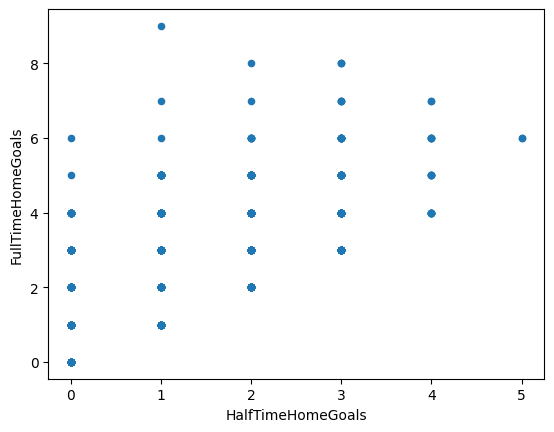

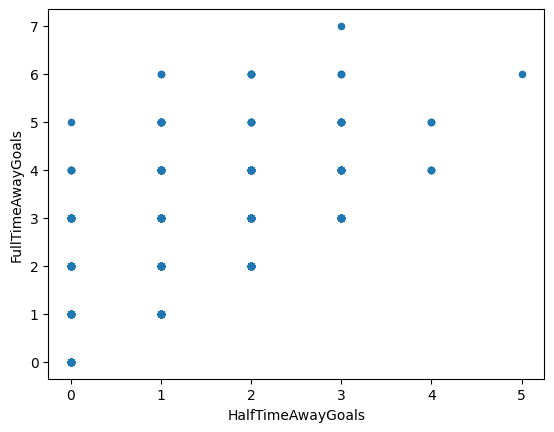

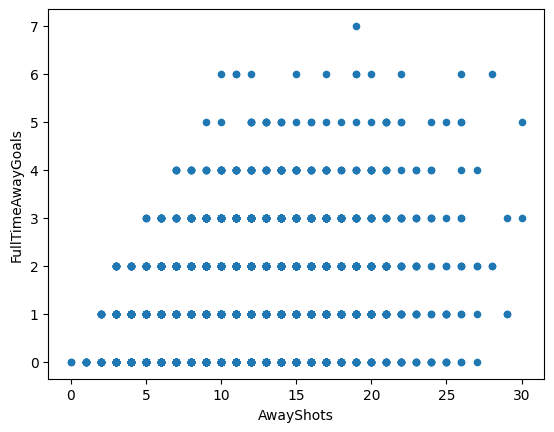

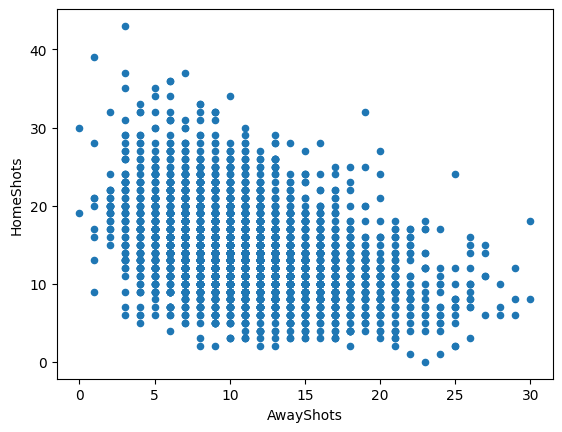

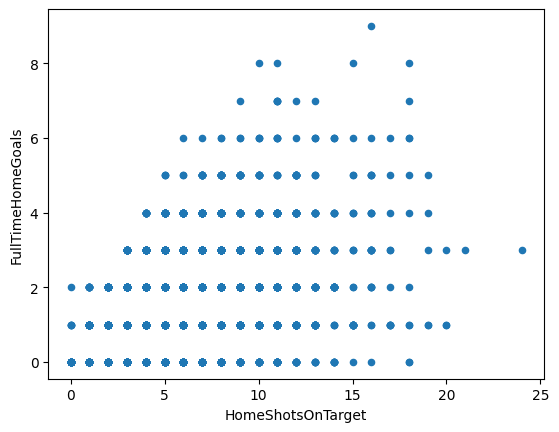

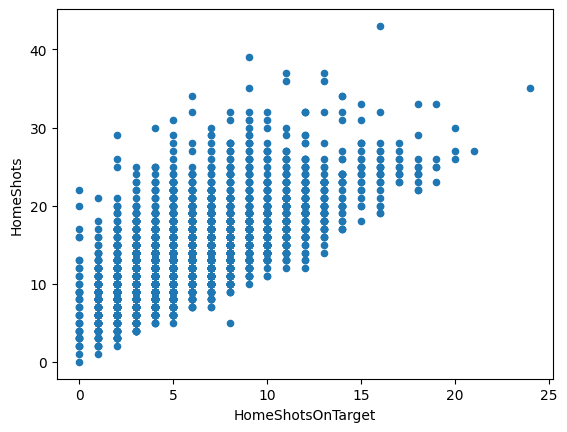

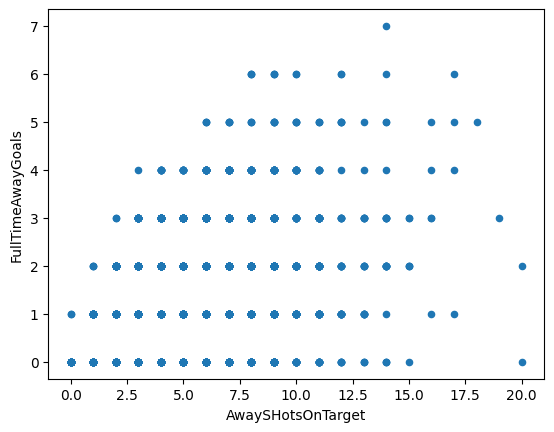

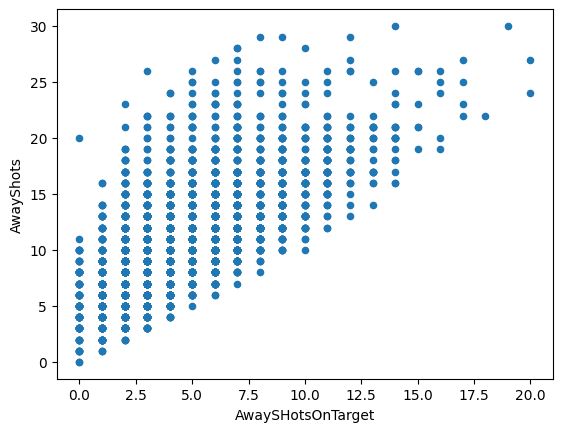

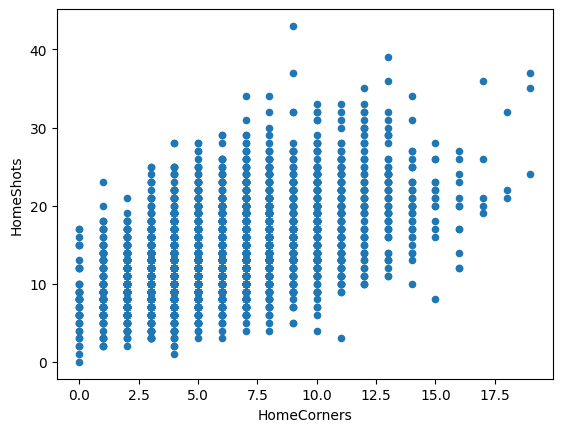

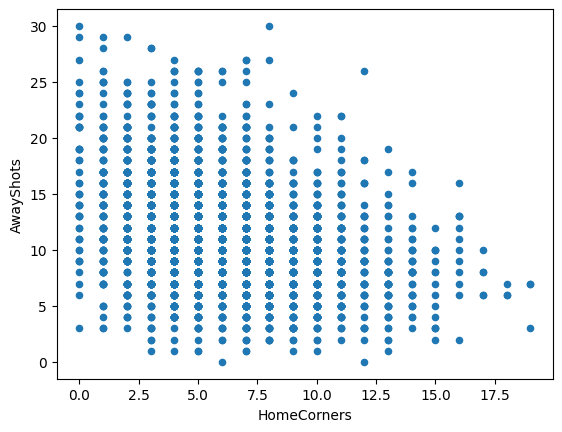

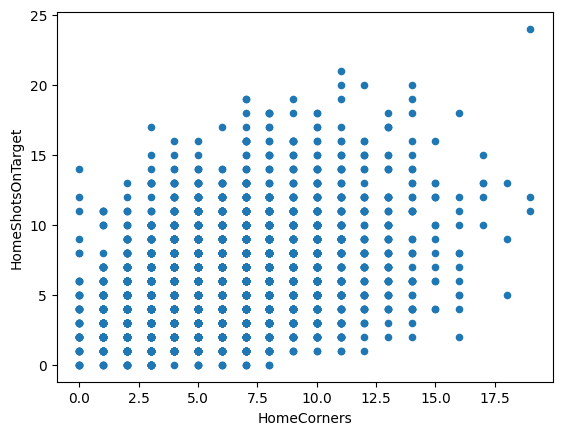

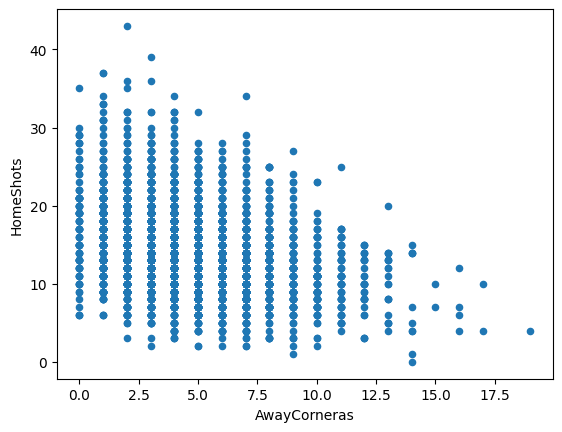

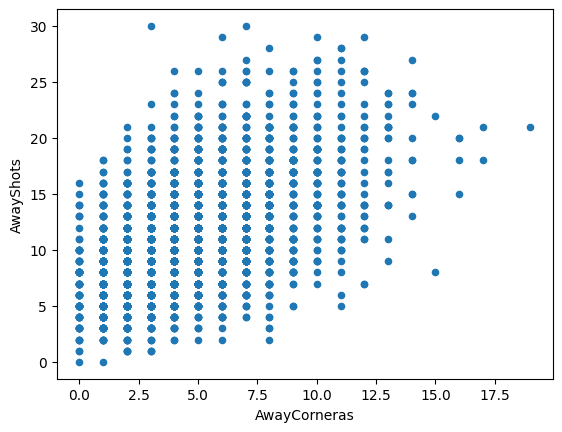

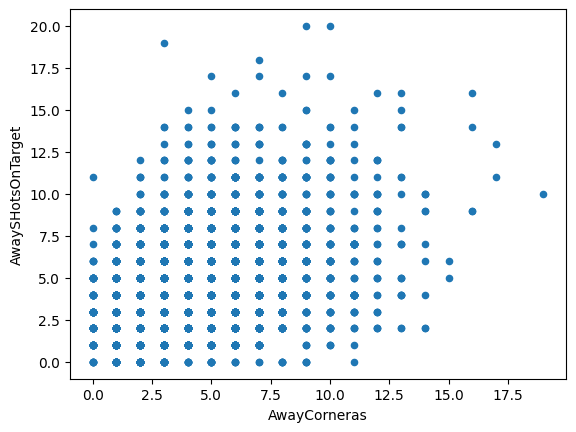

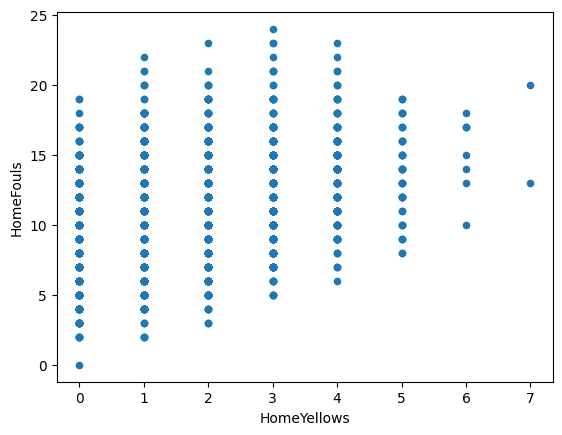

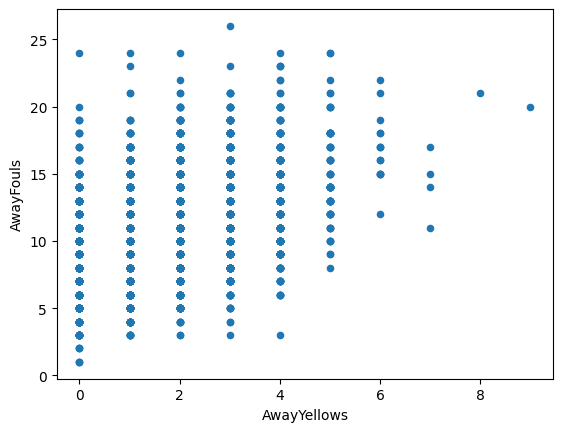

In [205]:
# Correlation matrix and Scatter plot between match columns
display(Match.corr(numeric_only = True))
Match.plot.scatter(x = "HalfTimeHomeGoals", y = "FullTimeHomeGoals")
Match.plot.scatter(x = "HalfTimeAwayGoals", y = "FullTimeAwayGoals")
Match.plot.scatter(x = "AwayShots", y = "FullTimeAwayGoals")
Match.plot.scatter(x = "AwayShots", y = "HomeShots")
Match.plot.scatter(x = "HomeShotsOnTarget", y = "FullTimeHomeGoals")
Match.plot.scatter(x = "HomeShotsOnTarget", y = "HomeShots")
Match.plot.scatter(x = "AwaySHotsOnTarget", y = "FullTimeAwayGoals")
Match.plot.scatter(x = "AwaySHotsOnTarget", y = "AwayShots")
Match.plot.scatter(x = "HomeCorners", y = "HomeShots")
Match.plot.scatter(x = "HomeCorners", y = "AwayShots")
Match.plot.scatter(x = "HomeCorners", y = "HomeShotsOnTarget")
Match.plot.scatter(x = "AwayCorneras", y = "HomeShots")
Match.plot.scatter(x = "AwayCorneras", y = "AwayShots")
Match.plot.scatter(x = "AwayCorneras", y = "AwaySHotsOnTarget")
Match.plot.scatter(x = "HomeYellows", y = "HomeFouls")
Match.plot.scatter(x = "AwayYellows", y = "AwayFouls")

In [206]:
# Correlation matrix and Scatter plot between event columns

In [207]:
# Correlation matrix for lineup columns
Lineup.corr(numeric_only = True)

,GameID,ClubID,PlayerID,Number,Captain
GameID,1.000000,-0.067845,0.053365,0.006180,-0.002265
ClubID,-0.067845,1.000000,0.020866,-0.040488,0.000136
PlayerID,0.053365,0.020866,1.000000,0.429514,-0.168825
Number,0.006180,-0.040488,0.429514,1.000000,-0.135265
Captain,-0.002265,0.000136,-0.168825,-0.135265,1.000000


<Axes: xlabel='RecordMarketValue', ylabel='MarketValue'>

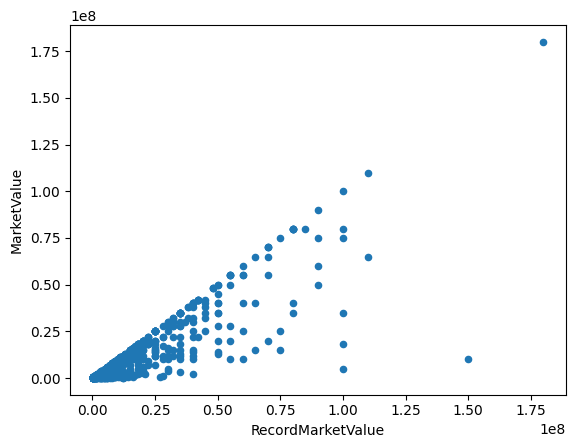

In [208]:
# Correlation matrix and Scatter plot between player columns
# get rid of string columns
Player.corr(numeric_only = True)
Player.plot.scatter(x = "RecordMarketValue", y = "MarketValue")

,Year,Position,Matches,Wins,Draws,Loses,Goals,Misses,Points,ExpectedGoals,ExpectedGoalsDifference,ExpectedGoalsAgainst,ExpectedGoalsAgainstDifference,ExpectedPoints,ExpectedPointsDifference
Year,1.000000e+00,-1.637560e-14,NaN,0.038149,-0.166924,0.041087,0.054860,0.074092,0.013348,0.154737,0.200311,0.202589,0.191330,0.013499,-0.005912
Position,-1.637560e-14,1.000000e+00,NaN,-0.923957,0.150334,0.921106,-0.859471,0.832006,-0.945804,-0.817250,0.496630,0.766177,-0.341248,-0.875577,0.574601
Matches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wins,3.814882e-02,-9.239574e-01,NaN,1.000000,-0.379385,-0.890247,0.925359,-0.819581,0.988992,0.871575,-0.553533,-0.769489,0.311805,0.898052,-0.634507
Draws,-1.669237e-01,1.503335e-01,NaN,-0.379385,1.000000,-0.083680,-0.315541,-0.010478,-0.238300,-0.300420,0.181471,0.019651,0.052647,-0.175167,0.232161
Loses,4.108670e-02,9.211059e-01,NaN,-0.890247,-0.083680,1.000000,-0.841287,0.887856,-0.947845,-0.790805,0.506827,0.819075,-0.361734,-0.880981,0.569082
Goals,5.485999e-02,-8.594713e-01,NaN,0.925359,-0.315541,-0.841287,1.000000,-0.691165,0.920854,0.936635,-0.610042,-0.706399,0.168101,0.902288,-0.463652
Misses,7.409192e-02,8.320058e-01,NaN,-0.819581,-0.010478,0.887856,-0.691165,1.000000,-0.861962,-0.672336,0.365166,0.855264,-0.518430,-0.812250,0.496183
Points,1.334783e-02,-9.458039e-01,NaN,0.988992,-0.238300,-0.947845,0.920854,-0.861962,1.000000,0.866817,-0.552003,-0.804564,0.335711,0.914641,-0.628891
ExpectedGoals,1.547374e-01,-8.172497e-01,NaN,0.871575,-0.300420,-0.790805,0.936635,-0.672336,0.866817,1.000000,-0.293814,-0.694721,0.151035,0.937282,-0.267315


<Axes: xlabel='ExpectedPoints', ylabel='Points'>

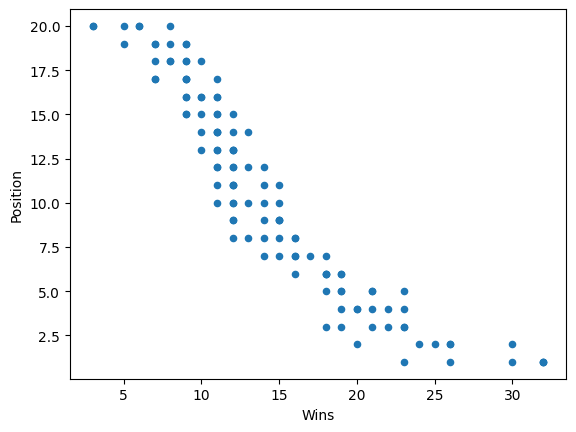

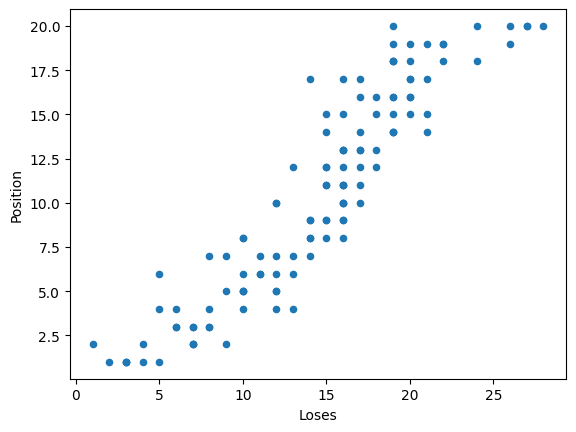

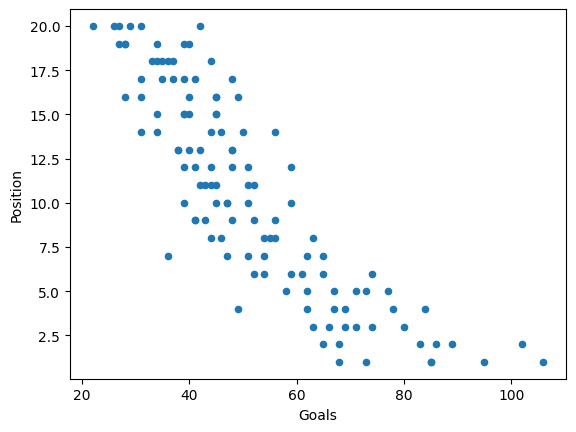

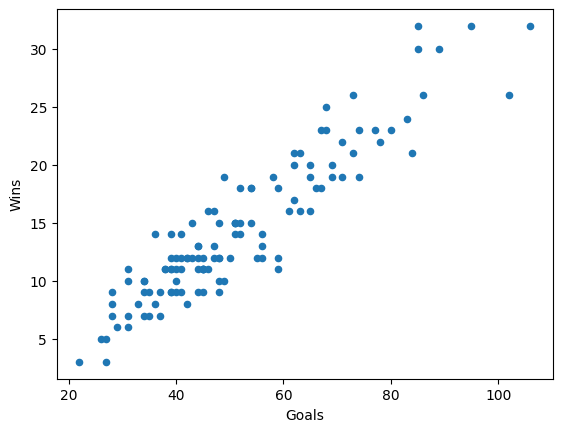

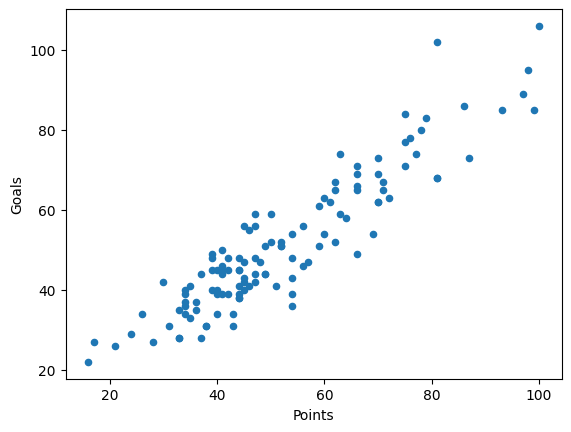

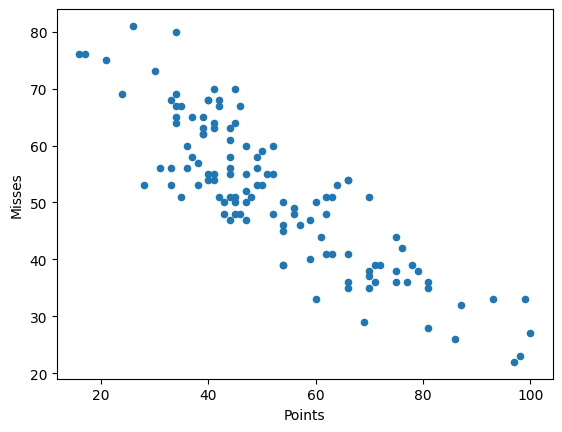

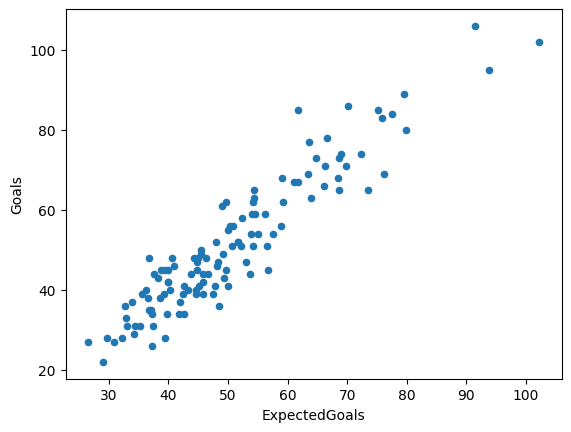

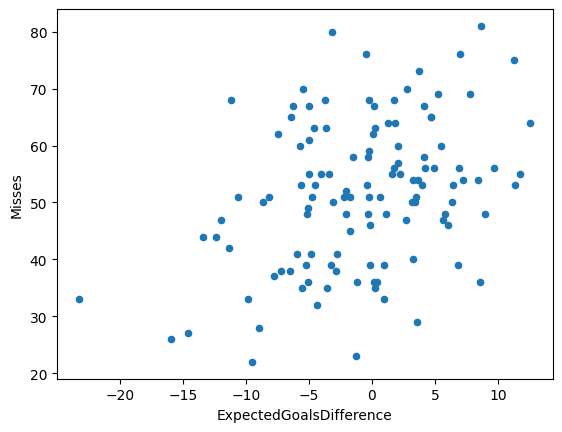

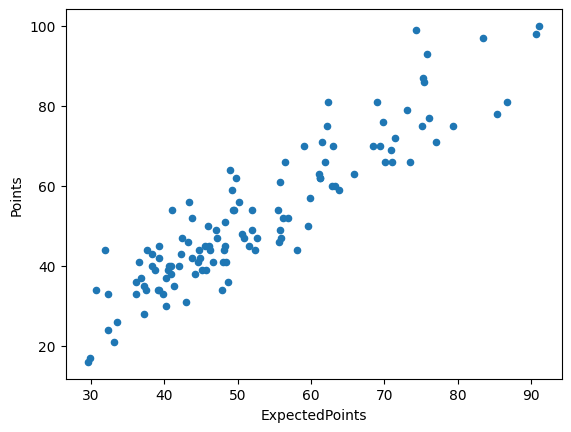

In [209]:
# Correlation matrix and Scatter plots between table columns
Table = Table.toPandas()
display(Table.corr(numeric_only = True))
Table.plot.scatter(x = "Wins", y = "Position")
Table.plot.scatter(x = "Loses", y = "Position")
Table.plot.scatter(x = "Goals", y = "Position")
Table.plot.scatter(x = "Goals", y = "Wins")
Table.plot.scatter(x = "Points", y = "Goals")
Table.plot.scatter(x = "Points", y = "Misses")
Table.plot.scatter(x = "ExpectedGoals", y = "Goals")
Table.plot.scatter(x = "ExpectedGoalsDifference", y = "Misses")
Table.plot.scatter(x = "ExpectedPoints", y = "Points")

In [210]:
# Correlation matrix and Scatter plots between transfer columns
Transfer.corr(numeric_only = True)

,Age,Fee,Year
Age,1.000000,-0.030500,0.007262
Fee,-0.030500,1.000000,0.183488
Year,0.007262,0.183488,1.000000


In [211]:
# correlation matrix between club and table
display(pd.concat([Club, Table], axis=1).corr(numeric_only = True))

,ClubID,SquadSize,AverageAge,NationalTeamPlayers,StadiumSeats,TransferRecord,Year,Position,Matches,Wins,...,Loses,Goals,Misses,Points,ExpectedGoals,ExpectedGoalsDifference,ExpectedGoalsAgainst,ExpectedGoalsAgainstDifference,ExpectedPoints,ExpectedPointsDifference
ClubID,1.000000,-0.165885,0.039631,-0.245275,0.078238,-0.452109,8.574929e-01,3.018917e-01,NaN,-0.402750,...,0.185600,-0.242545,0.277432,-0.340675,-0.226262,0.161582,0.259671,-0.066452,-0.257867,0.295036
SquadSize,-0.165885,1.000000,-0.319684,0.250552,-0.019650,0.217199,-6.954230e-02,-1.847961e-01,NaN,0.153166,...,-0.161775,0.142357,-0.250744,0.160385,0.133772,-0.092552,-0.231583,0.064646,0.190926,-0.019385
AverageAge,0.039631,-0.319684,1.000000,0.016630,0.100720,-0.147598,-6.116932e-02,1.882779e-01,NaN,-0.201233,...,0.087715,-0.073936,0.115764,-0.168520,-0.053194,0.086339,0.189752,0.092389,-0.117516,0.163207
NationalTeamPlayers,-0.245275,0.250552,0.016630,1.000000,0.566741,0.699431,-1.881066e-01,-1.152093e-01,NaN,0.175381,...,-0.145408,0.085549,-0.217476,0.170183,0.106163,0.004949,-0.179192,0.088040,0.144616,-0.120224
StadiumSeats,0.078238,-0.019650,0.100720,0.566741,1.000000,0.407251,-2.059855e-02,1.861012e-01,NaN,-0.095661,...,0.118474,-0.070685,0.103538,-0.106064,-0.039945,0.108180,0.053748,-0.088491,-0.071680,0.106643
TransferRecord,-0.452109,0.217199,-0.147598,0.699431,0.407251,1.000000,-4.061219e-01,-1.023156e-01,NaN,0.221283,...,-0.133718,0.014771,-0.144886,0.197907,0.023216,0.012337,-0.084804,0.109676,0.039394,-0.361186
Year,0.857493,-0.069542,-0.061169,-0.188107,-0.020599,-0.406122,1.000000e+00,-1.637560e-14,NaN,0.038149,...,0.041087,0.054860,0.074092,0.013348,0.154737,0.200311,0.202589,0.191330,0.013499,-0.005912
Position,0.301892,-0.184796,0.188278,-0.115209,0.186101,-0.102316,-1.637560e-14,1.000000e+00,NaN,-0.923957,...,0.921106,-0.859471,0.832006,-0.945804,-0.817250,0.496630,0.766177,-0.341248,-0.875577,0.574601
Matches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wins,-0.402750,0.153166,-0.201233,0.175381,-0.095661,0.221283,3.814882e-02,-9.239574e-01,NaN,1.000000,...,-0.890247,0.925359,-0.819581,0.988992,0.871575,-0.553533,-0.769489,0.311805,0.898052,-0.634507


In [213]:
# correlation matrix between match and table
display(pd.concat([Match, Table], axis=1).corr(numeric_only = True))

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwaySHotsOnTarget,HomeFouls,AwayFouls,...,Loses,Goals,Misses,Points,ExpectedGoals,ExpectedGoalsDifference,ExpectedGoalsAgainst,ExpectedGoalsAgainstDifference,ExpectedPoints,ExpectedPointsDifference
FullTimeHomeGoals,1.000000,-0.084583,0.684379,-0.059961,0.288352,-0.152125,0.446156,-0.100444,-0.059840,-0.045542,...,0.121227,-0.087244,0.107191,-0.116337,-0.079037,0.059281,0.114052,-0.018646,-0.089108,0.106432
FullTimeAwayGoals,-0.084583,1.000000,-0.076795,0.688853,-0.129333,0.315120,-0.105015,0.447233,0.025352,-0.035226,...,-0.067721,0.029684,-0.080811,0.090292,0.066231,0.068811,-0.094347,0.000256,0.087865,-0.046629
HalfTimeHomeGoals,0.684379,-0.076795,1.000000,-0.063928,0.113571,-0.050176,0.262534,-0.055309,-0.010984,-0.018723,...,0.155395,-0.113976,0.099350,-0.130907,-0.084840,0.119097,0.091049,-0.041474,-0.091296,0.137017
HalfTimeAwayGoals,-0.059961,0.688853,-0.063928,1.000000,-0.052253,0.152371,-0.057093,0.284159,0.023699,-0.003783,...,-0.114806,0.072610,-0.101862,0.125431,0.094231,0.015017,-0.082958,0.059675,0.098555,-0.109979
HomeShots,0.288352,-0.129333,0.113571,-0.052253,1.000000,-0.400996,0.658234,-0.257393,-0.140497,-0.018329,...,0.158258,-0.081527,0.123097,-0.146370,-0.062956,0.080056,0.130907,-0.021528,-0.107311,0.143141
AwayShots,-0.152125,0.315120,-0.050176,0.152371,-0.400996,1.000000,-0.278072,0.663517,0.055975,-0.086027,...,-0.080638,0.018143,-0.047702,0.041520,-0.012324,-0.077382,-0.069897,-0.023289,0.030975,-0.039577
HomeShotsOnTarget,0.446156,-0.105015,0.262534,-0.057093,0.658234,-0.278072,1.000000,0.002452,-0.077949,-0.020070,...,0.155249,-0.107861,0.127056,-0.159377,-0.092799,0.084409,0.139282,-0.015347,-0.129090,0.132316
AwaySHotsOnTarget,-0.100444,0.447233,-0.055309,0.284159,-0.257393,0.663517,0.002452,1.000000,0.056610,-0.063073,...,-0.128521,0.083654,-0.102765,0.105840,0.082320,-0.042062,-0.125921,-0.009480,0.114157,-0.033191
HomeFouls,-0.059840,0.025352,-0.010984,0.023699,-0.140497,0.055975,-0.077949,0.056610,1.000000,0.101572,...,-0.164403,0.212716,-0.093503,0.166044,0.167085,-0.202490,-0.166230,-0.093872,0.182177,-0.046140
AwayFouls,-0.045542,-0.035226,-0.018723,-0.003783,-0.018329,-0.086027,-0.020070,-0.063073,0.101572,1.000000,...,-0.035420,0.100261,-0.033310,0.048992,0.116201,-0.010737,-0.028749,0.016840,0.071731,0.020965


In [215]:
# correlation matrix between player and player value
PlayerValue = PlayerValue.toPandas()
display(pd.concat([Player, PlayerValue], axis=1).corr(numeric_only = True))

,PlayerID,CurrentClubID,Height,MarketValue,RecordMarketValue,PlayerID,CurrentClubID,LastSeason,MarketValue
PlayerID,1.000000,-0.176704,-0.100943,0.184824,0.063681,0.304158,0.014503,0.051739,-0.082102
CurrentClubID,-0.176704,1.000000,-0.009151,-0.238246,-0.233265,-0.058945,0.036750,-0.002263,0.044385
Height,-0.100943,-0.009151,1.000000,0.014791,0.022284,0.030003,0.004049,0.058856,-0.057226
MarketValue,0.184824,-0.238246,0.014791,1.000000,0.870558,0.104575,0.021491,0.033684,-0.060156
RecordMarketValue,0.063681,-0.233265,0.022284,0.870558,1.000000,0.080178,0.012729,0.031123,-0.039455
PlayerID,0.304158,-0.058945,0.030003,0.104575,0.080178,1.000000,-0.107920,0.518757,0.131005
CurrentClubID,0.014503,0.036750,0.004049,0.021491,0.012729,-0.107920,1.000000,-0.146275,-0.177845
LastSeason,0.051739,-0.002263,0.058856,0.033684,0.031123,0.518757,-0.146275,1.000000,0.311637
MarketValue,-0.082102,0.044385,-0.057226,-0.060156,-0.039455,0.131005,-0.177845,0.311637,1.000000


In [216]:
# correlation matrix between player and transfer
display(pd.concat([Player, Transfer], axis=1).corr(numeric_only = True))

,PlayerID,CurrentClubID,Height,MarketValue,RecordMarketValue,Age,Fee,Year
PlayerID,1.000000,-0.176704,-0.100943,0.184824,0.063681,-0.128711,-0.040535,-0.084567
CurrentClubID,-0.176704,1.000000,-0.009151,-0.238246,-0.233265,0.016598,-0.041665,0.065257
Height,-0.100943,-0.009151,1.000000,0.014791,0.022284,0.024442,-0.011633,-0.014267
MarketValue,0.184824,-0.238246,0.014791,1.000000,0.870558,0.029198,-0.060158,0.004873
RecordMarketValue,0.063681,-0.233265,0.022284,0.870558,1.000000,0.041895,-0.074868,-0.049922
Age,-0.128711,0.016598,0.024442,0.029198,0.041895,1.000000,-0.030500,0.007262
Fee,-0.040535,-0.041665,-0.011633,-0.060158,-0.074868,-0.030500,1.000000,0.183488
Year,-0.084567,0.065257,-0.014267,0.004873,-0.049922,0.007262,0.183488,1.000000


In [217]:
# correlation matrix between player value and transfer
display(pd.concat([PlayerValue, Transfer], axis=1).corr(numeric_only = True))

,PlayerID,CurrentClubID,LastSeason,MarketValue,Age,Fee,Year
PlayerID,1.000000,-0.107920,0.518757,0.131005,-0.006839,0.019127,-0.053829
CurrentClubID,-0.107920,1.000000,-0.146275,-0.177845,-0.003099,-0.012422,0.002738
LastSeason,0.518757,-0.146275,1.000000,0.311637,-0.005973,0.041193,-0.028812
MarketValue,0.131005,-0.177845,0.311637,1.000000,-0.011397,0.020530,-0.006358
Age,-0.006839,-0.003099,-0.005973,-0.011397,1.000000,-0.030500,0.007262
Fee,0.019127,-0.012422,0.041193,0.020530,-0.030500,1.000000,0.183488
Year,-0.053829,0.002738,-0.028812,-0.006358,0.007262,0.183488,1.000000


In [ ]:
### REFERENCES ###

# PyPI. (2019). pyodbc. [online] Available at: https://pypi.org/project/pyodbc/.
# www.w3schools.com. (n.d.). Pandas DataFrames. [online] Available at: https://www.w3schools.com/python/pandas/pandas_dataframes.asp.
# www.w3schools.com. (n.d.). Matplotlib Pyplot. [online] Available at: https://www.w3schools.com/python/matplotlib_pyplot.asp.
# spark.apache.org. (n.d.). Spark SQL — PySpark 3.5.0 documentation. [online] Available at: https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/index.html.